In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [192]:
# Retrieve the dasma from the website
url = "https://www.citypopulation.de/en/philippines/dasmarinas/"
data = pd.read_html(url)
data[0] = data[0].drop("Unnamed: 6", axis=1)

# Convert it into a csv file
data[0].to_csv("./data/dasma_dataset.csv")

In [193]:
dasma = pd.read_csv("./data/dasma_dataset.csv", index_col=0)
dasma.columns = [
    "Name",
    "Status",
    "2000",
    "2010",
    "2015",
    "2020",
]
dasma.head()

,Name,Status,2000,2010,2015,2020
0,Burol,Barangay,5937,9526,8260,11902
1,Burol I,Barangay,6425,14912,15751,17287
2,Burol II,Barangay,4299,4442,4838,6025
3,Burol III,Barangay,5663,8473,9077,10921
4,Datu Esmael (Bago-a-ingud),Barangay,16726,9079,13112,7969


## Explanatory Data Analysis

In [194]:
dasma.dtypes
# the 2000 column has a dtype of "object"

Name      object
Status    object
2000      object
2010       int64
2015       int64
2020       int64
dtype: object

In [195]:
# Since there are 2 "..." values
dasma["2000"] = dasma["2000"].apply(lambda x: x if x != "..." else 5_000)
dasma["2000"] = dasma["2000"].astype("int64")

In [196]:
dasma.dtypes

Name      object
Status    object
2000       int64
2010       int64
2015       int64
2020       int64
dtype: object

In [197]:
# Check if there are null values
dasma.isnull().sum()

Name      0
Status    0
2000      0
2010      0
2015      0
2020      0
dtype: int64

In [198]:
population_greater_than_10k = dasma[
    (dasma["2000"] >= 10_000)
    & (dasma["2010"] >= 10_000)
    & (dasma["2015"] >= 10_000)
    & (dasma["2020"] >= 10_000)
]
print(f"Shape: {population_greater_than_10k}")
population_greater_than_10k.head()

Shape:              Name    Status    2000    2010    2015    2020
12    Langkaan II  Barangay   13861   25350   30197   33651
17  Paliparan III  Barangay   41511   59838   68224   72945
21        Salawag  Barangay   28994   61441   80136   78778
24   Salitran III  Barangay   10310   14681   14949   15396
75     Dasmariñas      City  379520  575817  659019  703141


,Name,Status,2000,2010,2015,2020
12,Langkaan II,Barangay,13861,25350,30197,33651
17,Paliparan III,Barangay,41511,59838,68224,72945
21,Salawag,Barangay,28994,61441,80136,78778
24,Salitran III,Barangay,10310,14681,14949,15396
75,Dasmariñas,City,379520,575817,659019,703141


In [199]:
population_less_than_10k = dasma[
    (dasma["2000"] < 10_000)
    & (dasma["2010"] < 10_000)
    & (dasma["2015"] < 10_000)
    & (dasma["2020"] < 10_000)
]
print(f"Shape: {population_less_than_10k}")
population_less_than_10k.head()

Shape:                             Name    Status  2000  2010  2015  2020
2                       Burol II  Barangay  4299  4442  4838  6025
5             Emmanuel Bergado I  Barangay  3982  6653  7386  8002
6            Emmanuel Bergado II  Barangay  2389  2714  2982  2796
7                       Fatima I  Barangay  5542  5855  6291  6782
8                      Fatima II  Barangay  3617  3864  4023  4305
9                     Fatima III  Barangay  2638  3658  3712  3684
10                           H-2  Barangay  5000  9182  9477  9306
13                  Luzviminda I  Barangay  2565  3080  3285  3565
14                 Luzviminda II  Barangay  3900  4346  4688  4868
19                 Saint Peter I  Barangay  1991  2347  2553  2287
20                Saint Peter II  Barangay  2091  2238  2462  2471
22                    Salitran I  Barangay  3381  3694  5626  5158
26                    Sampaloc I  Barangay  4181  5539  6612  7662
30                    Sampaloc V  Barangay  3433  3146 

,Name,Status,2000,2010,2015,2020
2,Burol II,Barangay,4299,4442,4838,6025
5,Emmanuel Bergado I,Barangay,3982,6653,7386,8002
6,Emmanuel Bergado II,Barangay,2389,2714,2982,2796
7,Fatima I,Barangay,5542,5855,6291,6782
8,Fatima II,Barangay,3617,3864,4023,4305


In [200]:
np.random.seed(42)


def generate_synthetic_data():
    confirmed_cases = np.random.randint(50, 501)
    deaths = np.random.randint(0, int(confirmed_cases * 0.3) + 1)
    recoveries = np.random.randint(deaths + 1, confirmed_cases + 1)
    return confirmed_cases, deaths, recoveries


synthetic_data = []
for i, j in dasma.iterrows():
    confirmed_cases, deaths, recoveries = generate_synthetic_data()
    synthetic_data.append(
        {
            "Confirmed Cases": confirmed_cases,
            "Deaths": deaths,
            "Recoveries": recoveries,
        }
    )


synthetic_df = pd.DataFrame(synthetic_data)
dasma = dasma.join(synthetic_df)

In [201]:
dasma.head()

,Name,Status,2000,2010,2015,2020,Confirmed Cases,Deaths,Recoveries
0,Burol,Barangay,5937,9526,8260,11902,152,28,43
1,Burol I,Barangay,6425,14912,15751,17287,156,7,28
2,Burol II,Barangay,4299,4442,4838,6025,152,18,93
3,Burol III,Barangay,5663,8473,9077,10921,137,35,59
4,Datu Esmael (Bago-a-ingud),Barangay,16726,9079,13112,7969,180,21,74


In [202]:
dasma_barangay = dasma[dasma["Status"] == "Barangay"]
dasma_barangay.head()

,Name,Status,2000,2010,2015,2020,Confirmed Cases,Deaths,Recoveries
0,Burol,Barangay,5937,9526,8260,11902,152,28,43
1,Burol I,Barangay,6425,14912,15751,17287,156,7,28
2,Burol II,Barangay,4299,4442,4838,6025,152,18,93
3,Burol III,Barangay,5663,8473,9077,10921,137,35,59
4,Datu Esmael (Bago-a-ingud),Barangay,16726,9079,13112,7969,180,21,74


In [203]:
dasma_barangay_sample = dasma_barangay.sample(len(dasma_barangay) // 2)
dasma_barangay_sample.sort_values(by="Name", inplace=True)

dasma_barangay_sample.head()

,Name,Status,2000,2010,2015,2020,Confirmed Cases,Deaths,Recoveries
1,Burol I,Barangay,6425,14912,15751,17287,156,7,28
3,Burol III,Barangay,5663,8473,9077,10921,137,35,59
4,Datu Esmael (Bago-a-ingud),Barangay,16726,9079,13112,7969,180,21,74
7,Fatima I,Barangay,5542,5855,6291,6782,493,20,181
9,Fatima III,Barangay,2638,3658,3712,3684,285,48,267


# Dasma Statistical Data

## Scatter Plot

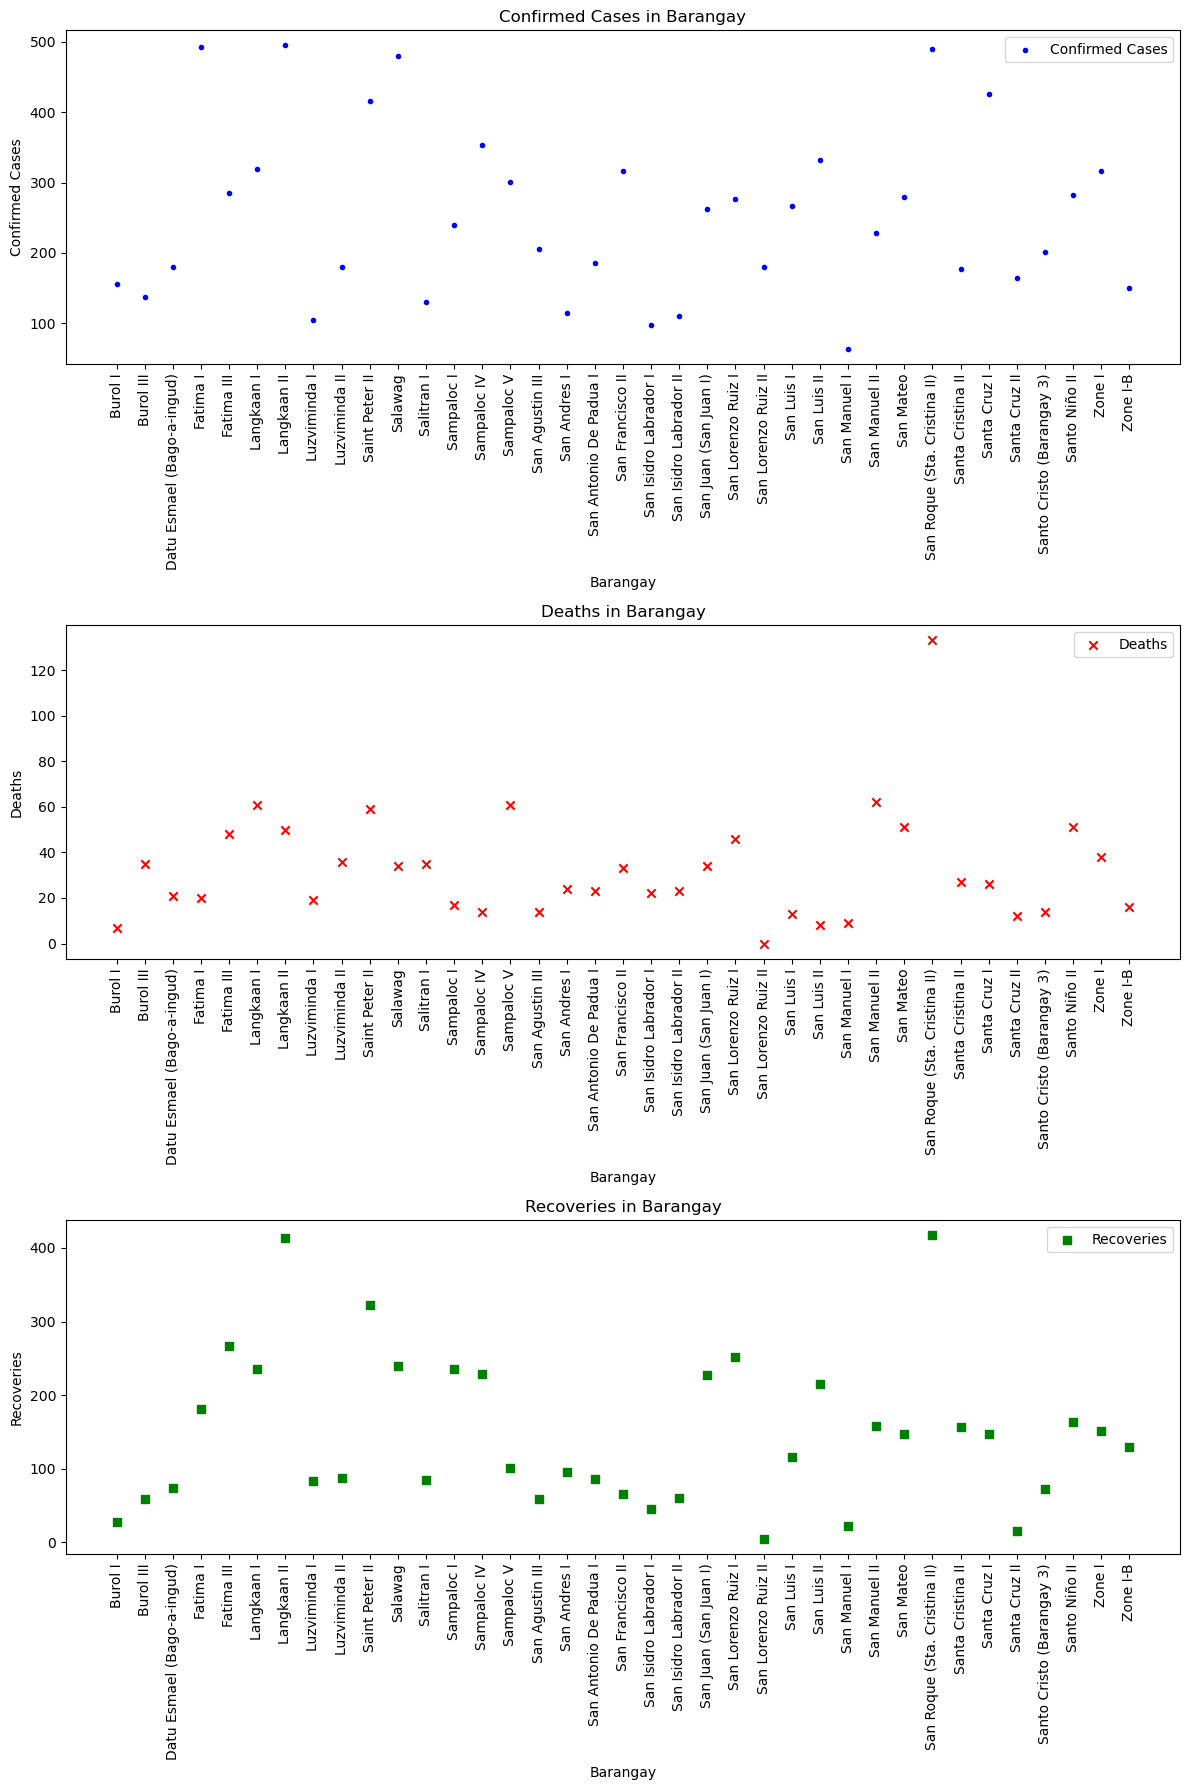

In [204]:
def create_scatter_plot(ax, data, X, y, color, label, marker, title, xlabel, ylabel):
    ax.scatter(
        data[X],
        data[y],
        color=color,
        label=label,
        marker=marker,
    )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    ax.tick_params(axis="x", rotation=90)


fig, axs = plt.subplots(3, 1, figsize=(12, 18))


create_scatter_plot(
    axs[0],
    dasma_barangay_sample,
    "Name",
    "Confirmed Cases",
    "blue",
    "Confirmed Cases",
    ".",
    "Confirmed Cases in Barangay",
    "Barangay",
    "Confirmed Cases",
)

create_scatter_plot(
    axs[1],
    dasma_barangay_sample,
    "Name",
    "Deaths",
    "red",
    "Deaths",
    "x",
    "Deaths in Barangay",
    "Barangay",
    "Deaths",
)

create_scatter_plot(
    axs[2],
    dasma_barangay_sample,
    "Name",
    "Recoveries",
    "green",
    "Recoveries",
    "s",
    "Recoveries in Barangay",
    "Barangay",
    "Recoveries",
)

plt.tight_layout()
plt.show()

## Line Plot

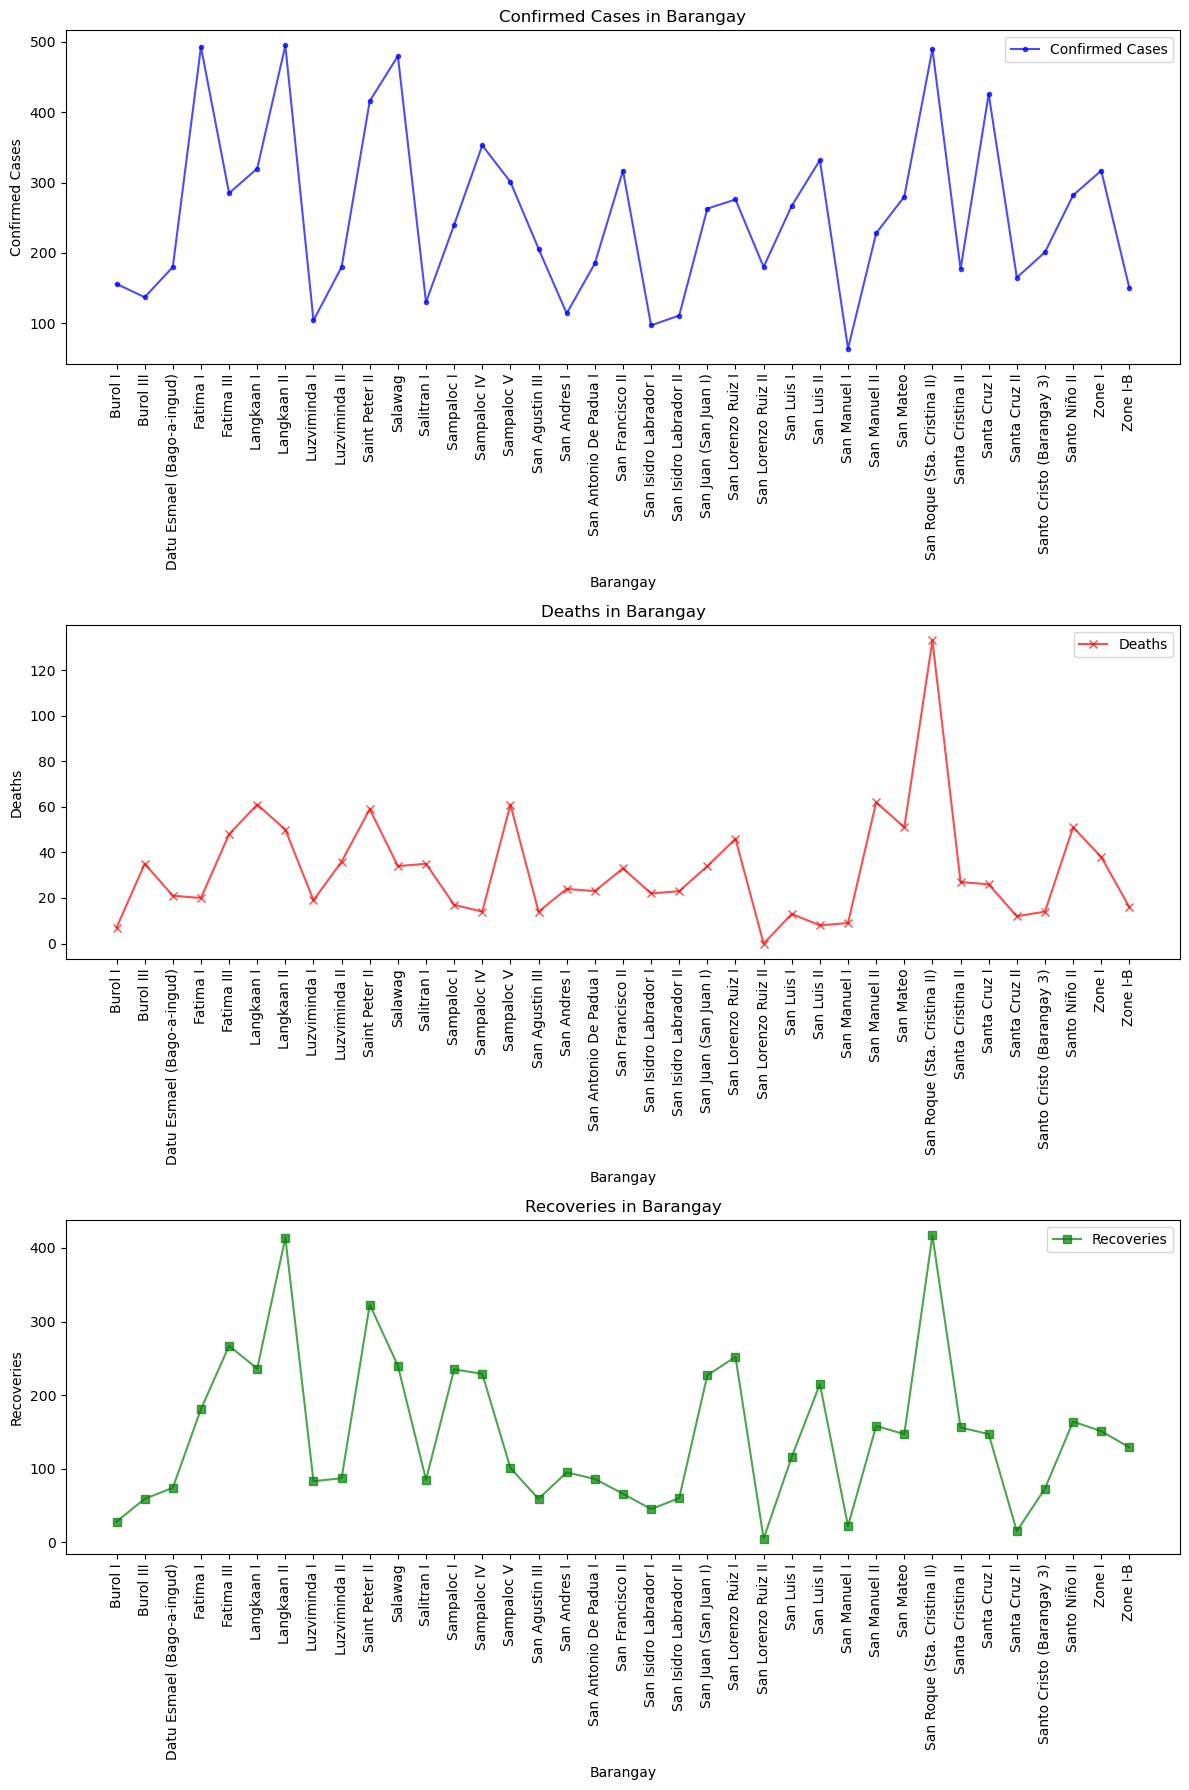

In [205]:
def create_line_plot(ax, data, X, y, color, label, marker, title, xlabel, ylabel):

    sorted_data = data.sort_values(by=X)
    ax.plot(
        sorted_data[X],
        sorted_data[y],
        color=color,
        label=label,
        marker=marker,
        alpha=0.7,
    ),
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    ax.tick_params(axis="x", rotation=90)


fig, axs = plt.subplots(3, 1, figsize=(12, 18))


create_line_plot(
    axs[0],
    dasma_barangay_sample,
    "Name",
    "Confirmed Cases",
    "blue",
    "Confirmed Cases",
    ".",
    "Confirmed Cases in Barangay",
    "Barangay",
    "Confirmed Cases",
)

create_line_plot(
    axs[1],
    dasma_barangay_sample,
    "Name",
    "Deaths",
    "red",
    "Deaths",
    "x",
    "Deaths in Barangay",
    "Barangay",
    "Deaths",
)

create_line_plot(
    axs[2],
    dasma_barangay_sample,
    "Name",
    "Recoveries",
    "green",
    "Recoveries",
    "s",
    "Recoveries in Barangay",
    "Barangay",
    "Recoveries",
)

plt.tight_layout()
plt.show()

## Bar Plot

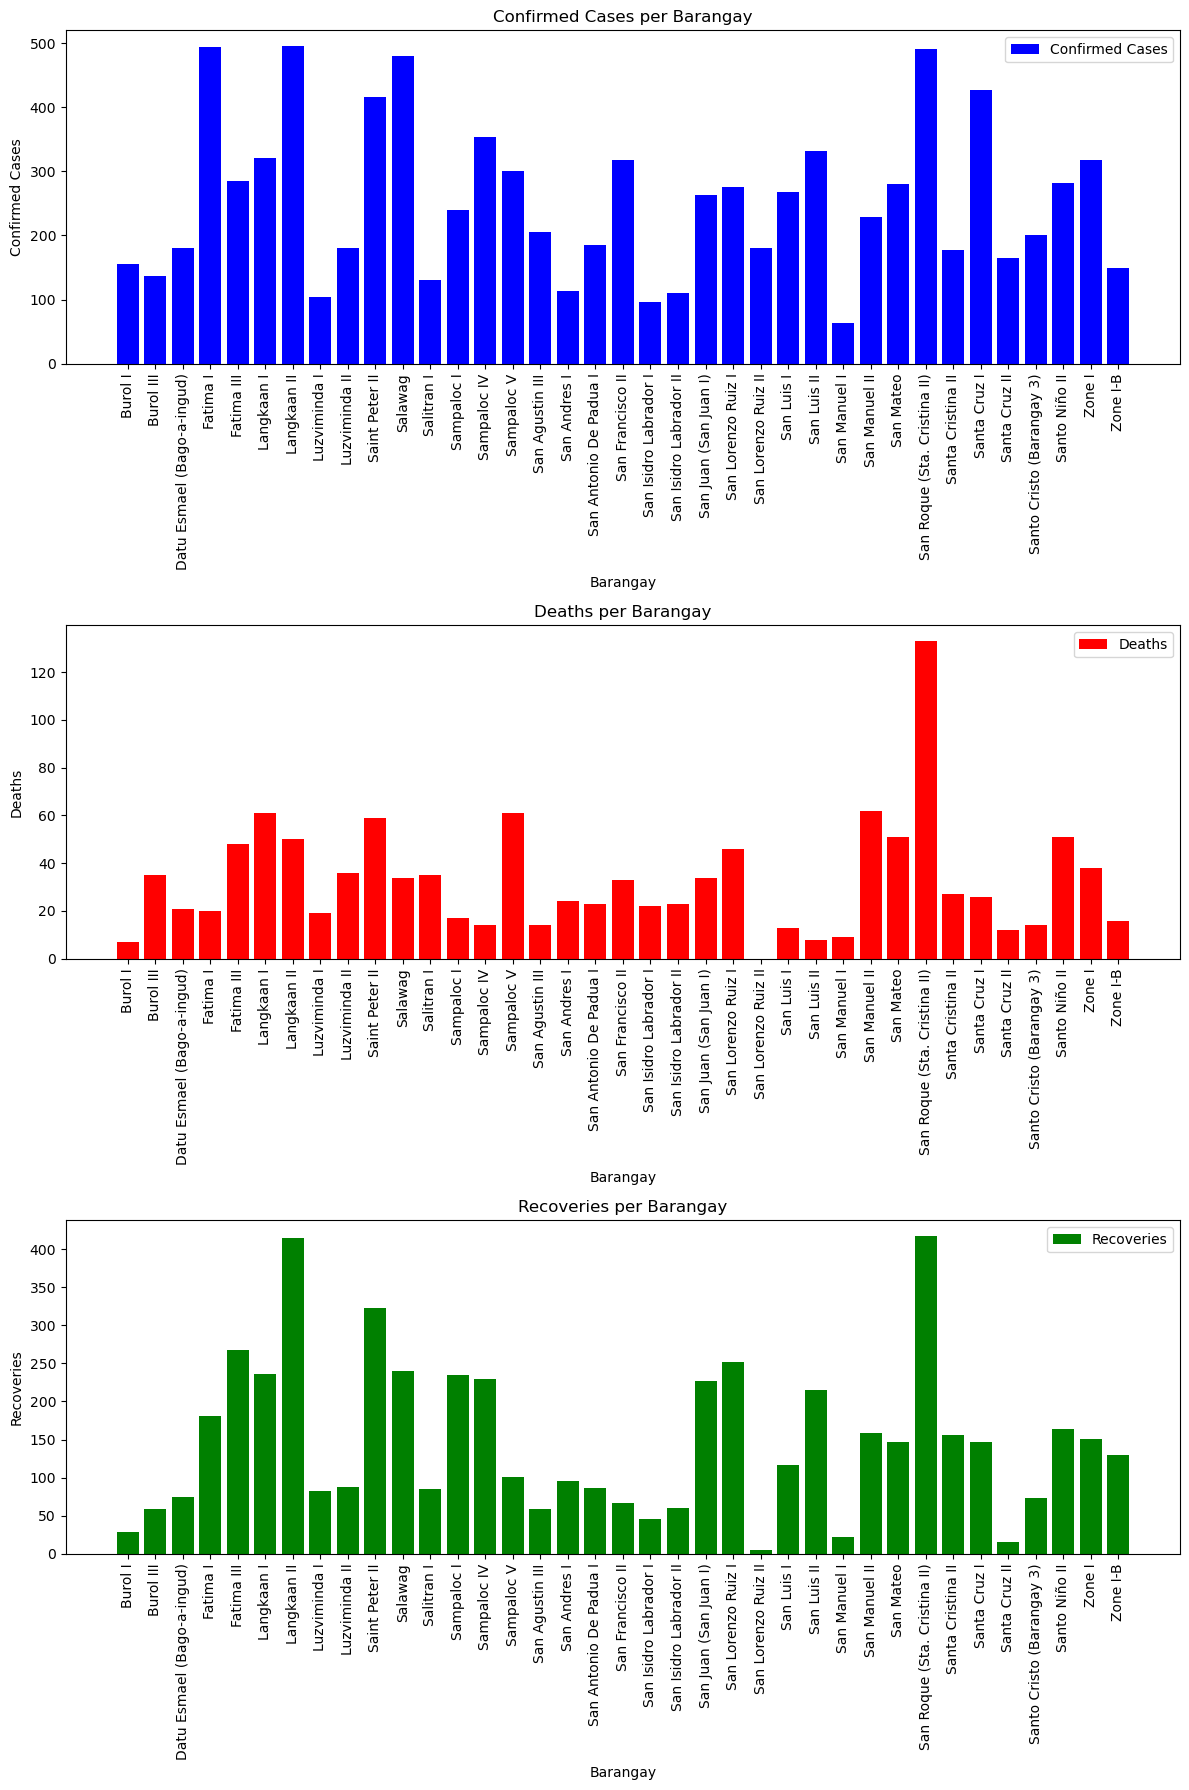

In [206]:
def create_bar_graph(ax, data, X, y, color, label, title, xlabel, ylabel):
    ax.bar(data[X], data[y], color=color, label=label)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    ax.tick_params(axis="x", rotation=90)


fig, axs = plt.subplots(3, 1, figsize=(12, 18))


create_bar_graph(
    axs[0],
    dasma_barangay_sample,
    "Name",
    "Confirmed Cases",
    "blue",
    "Confirmed Cases",
    "Confirmed Cases per Barangay",
    "Barangay",
    "Confirmed Cases",
)

create_bar_graph(
    axs[1],
    dasma_barangay_sample,
    "Name",
    "Deaths",
    "red",
    "Deaths",
    "Deaths per Barangay",
    "Barangay",
    "Deaths",
)

create_bar_graph(
    axs[2],
    dasma_barangay_sample,
    "Name",
    "Recoveries",
    "green",
    "Recoveries",
    "Recoveries per Barangay",
    "Barangay",
    "Recoveries",
)

plt.tight_layout()
plt.show()

## Pie Chart

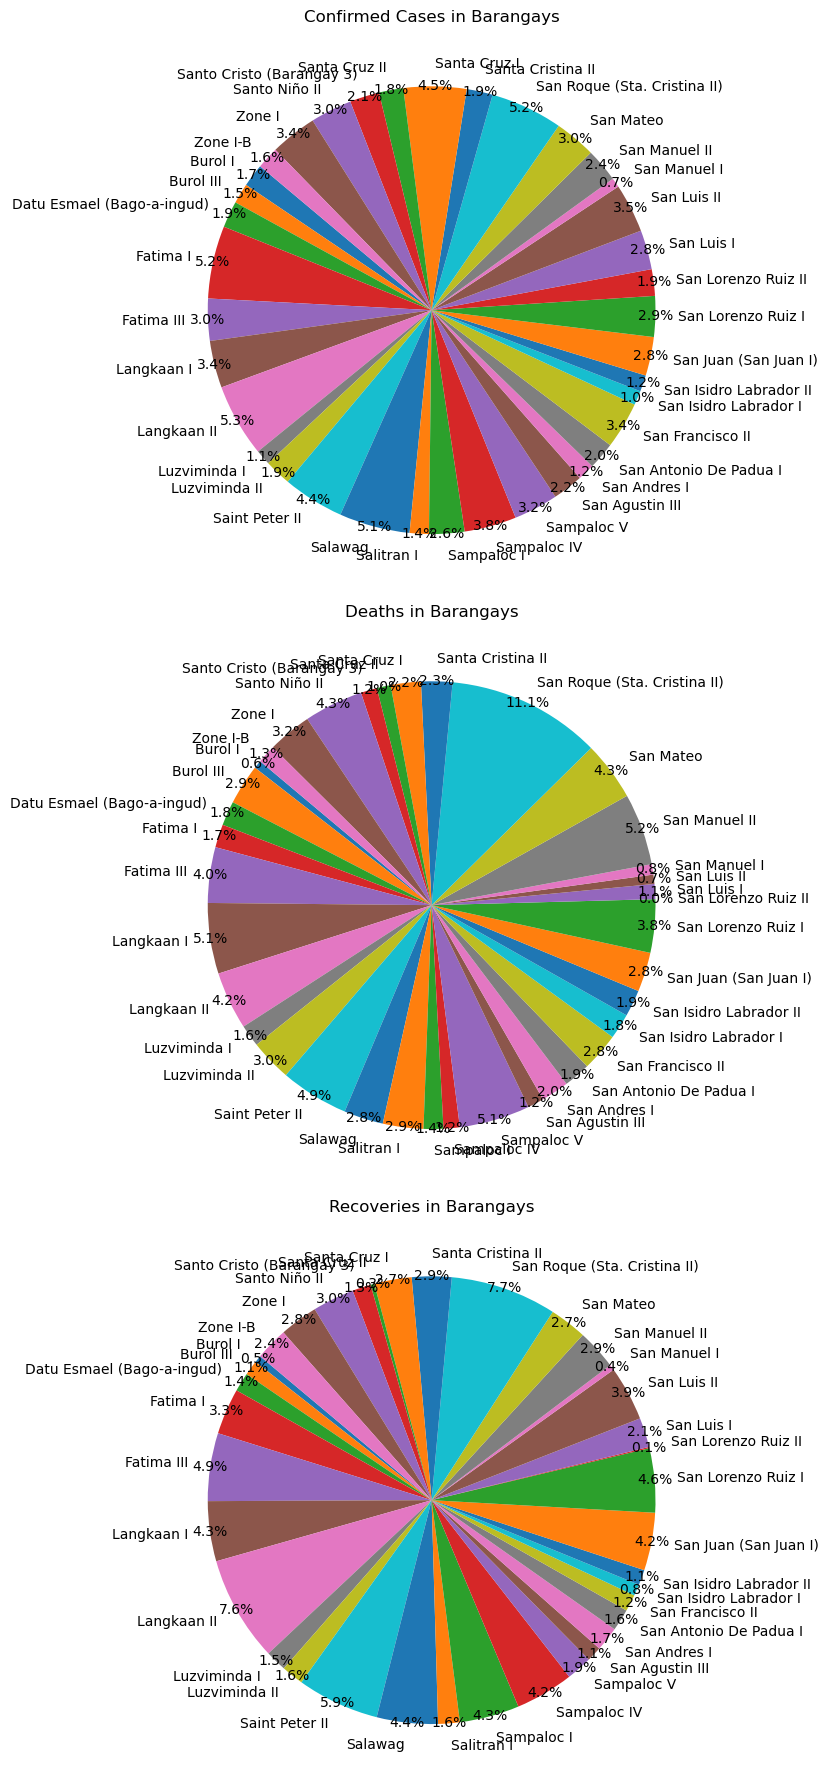

In [207]:
def create_pie_chart(ax, data, values_col, labels_col, title):

    ax.pie(
        data[values_col],
        labels=data[labels_col],
        autopct="%1.1f%%",
        startangle=140,
        pctdistance=1,
    )
    ax.set_title(title)


fig, axs = plt.subplots(3, 1, figsize=(12, 18))

create_pie_chart(
    axs[0],
    dasma_barangay_sample,
    "Confirmed Cases",
    "Name",
    "Confirmed Cases in Barangays",
)

create_pie_chart(
    axs[1],
    dasma_barangay_sample,
    "Deaths",
    "Name",
    "Deaths in Barangays",
)

create_pie_chart(
    axs[2],
    dasma_barangay_sample,
    "Recoveries",
    "Name",
    "Recoveries in Barangays",
)

plt.tight_layout()
plt.show()

## Histogram

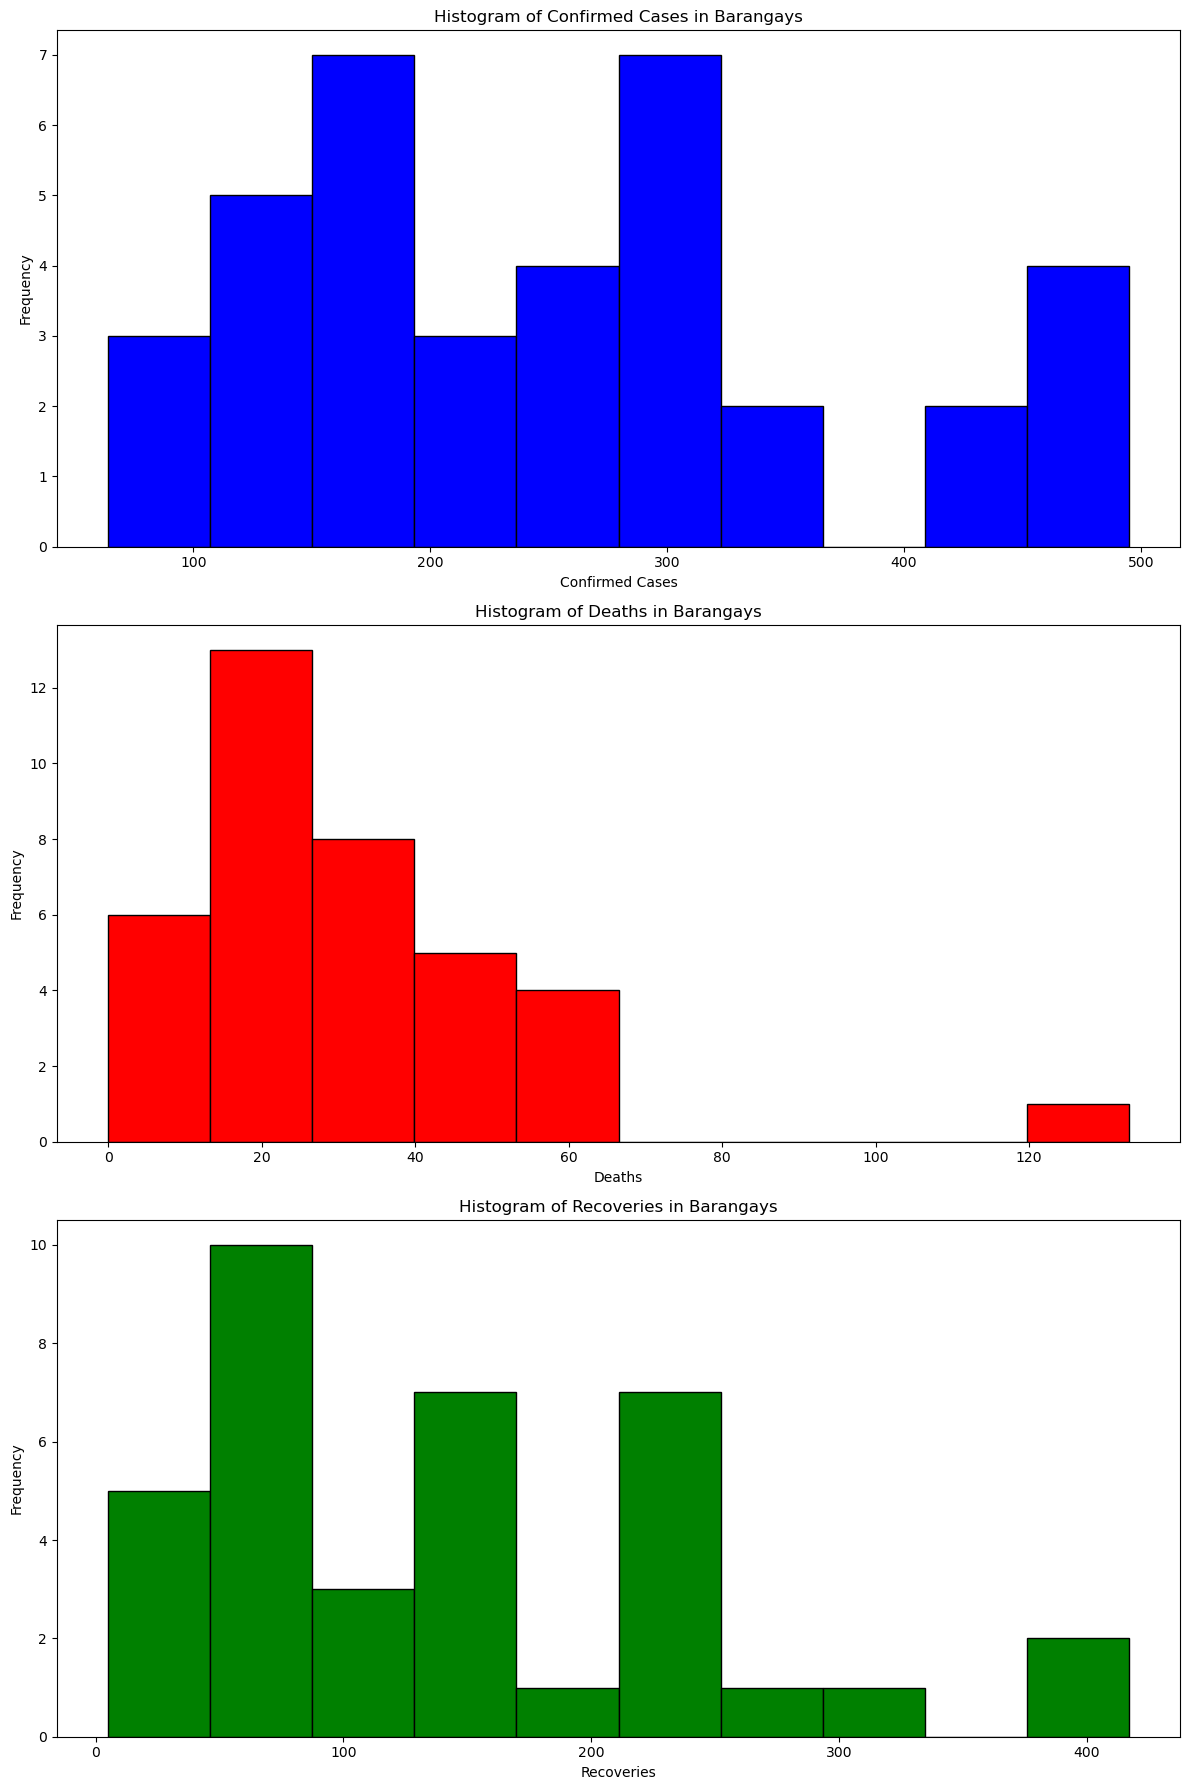

In [208]:
import matplotlib.pyplot as plt


def create_histogram(ax, data, column, color, title, xlabel, ylabel, bins=10):
    ax.hist(data[column], bins=bins, color=color, edgecolor="black")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)


fig, axs = plt.subplots(3, 1, figsize=(12, 18))


create_histogram(
    axs[0],
    dasma_barangay_sample,
    "Confirmed Cases",
    "blue",
    "Histogram of Confirmed Cases in Barangays",
    "Confirmed Cases",
    "Frequency",
)

create_histogram(
    axs[1],
    dasma_barangay_sample,
    "Deaths",
    "red",
    "Histogram of Deaths in Barangays",
    "Deaths",
    "Frequency",
)

create_histogram(
    axs[2],
    dasma_barangay_sample,
    "Recoveries",
    "green",
    "Histogram of Recoveries in Barangays",
    "Recoveries",
    "Frequency",
)

plt.tight_layout()
plt.show()

In [209]:
cavite = pd.read_csv("./data/cavite.csv", index_col=0)
cavite.head()

,Name,Status,Population Census 2000-05-01,Population Census 2010-05-01,Population Census 2015-08-01,Population Census 2020-05-01
105,Rosario,Municipality,86110,105561,116764,128352
252,Cavite,Province,2063161,3090691,3678301,4344829
253,Alfonso,Municipality,39674,48567,51839,59306
254,Amadeo,Municipality,25737,33457,37649,41901
255,Bacoor,City,305699,520216,600609,664625


In [210]:
cavite.columns = [
    "Name",
    "Status",
    "2000",
    "2010",
    "2015",
    "2020",
]

In [211]:
cavite.head()

,Name,Status,2000,2010,2015,2020
105,Rosario,Municipality,86110,105561,116764,128352
252,Cavite,Province,2063161,3090691,3678301,4344829
253,Alfonso,Municipality,39674,48567,51839,59306
254,Amadeo,Municipality,25737,33457,37649,41901
255,Bacoor,City,305699,520216,600609,664625


In [212]:
def generate_synthetic_data():
    confirmed_cases = np.random.randint(50, 501)
    deaths = np.random.randint(0, int(confirmed_cases * 0.3) + 1)
    recoveries = np.random.randint(deaths + 1, confirmed_cases + 1)
    return confirmed_cases, deaths, recoveries

In [213]:
cavite = cavite.reset_index(drop=True)


synthetic_data = []
for i, j in cavite.iterrows():
    confirmed_cases, deaths, recoveries = generate_synthetic_data()
    synthetic_data.append(
        {
            "Confirmed Cases": confirmed_cases,
            "Deaths": deaths,
            "Recoveries": recoveries,
        }
    )

synthetic_df = pd.DataFrame(synthetic_data)
cavite = cavite.join(synthetic_df)
cavite.head()

,Name,Status,2000,2010,2015,2020,Confirmed Cases,Deaths,Recoveries
0,Rosario,Municipality,86110,105561,116764,128352,161,24,123
1,Cavite,Province,2063161,3090691,3678301,4344829,202,28,174
2,Alfonso,Municipality,39674,48567,51839,59306,433,109,303
3,Amadeo,Municipality,25737,33457,37649,41901,359,34,242
4,Bacoor,City,305699,520216,600609,664625,494,67,356


In [214]:
cavite

,Name,Status,2000,2010,2015,2020,Confirmed Cases,Deaths,Recoveries
0,Rosario,Municipality,86110,105561,116764,128352,161,24,123
1,Cavite,Province,2063161,3090691,3678301,4344829,202,28,174
2,Alfonso,Municipality,39674,48567,51839,59306,433,109,303
3,Amadeo,Municipality,25737,33457,37649,41901,359,34,242
4,Bacoor,City,305699,520216,600609,664625,494,67,356
5,Carmona,Municipality,47856,74986,97557,106256,447,20,324
6,Cavite,City,99367,101120,102806,100674,453,127,262
7,General Emilio Aguinaldo,Municipality,14323,17507,22220,23973,244,16,144
8,General Mariano Alvarez,Municipality,112446,138540,155143,172433,82,15,74
9,General Trias,City,107691,243322,314303,450583,420,85,107


# Cavite Statistical Data

## Scatter Plot

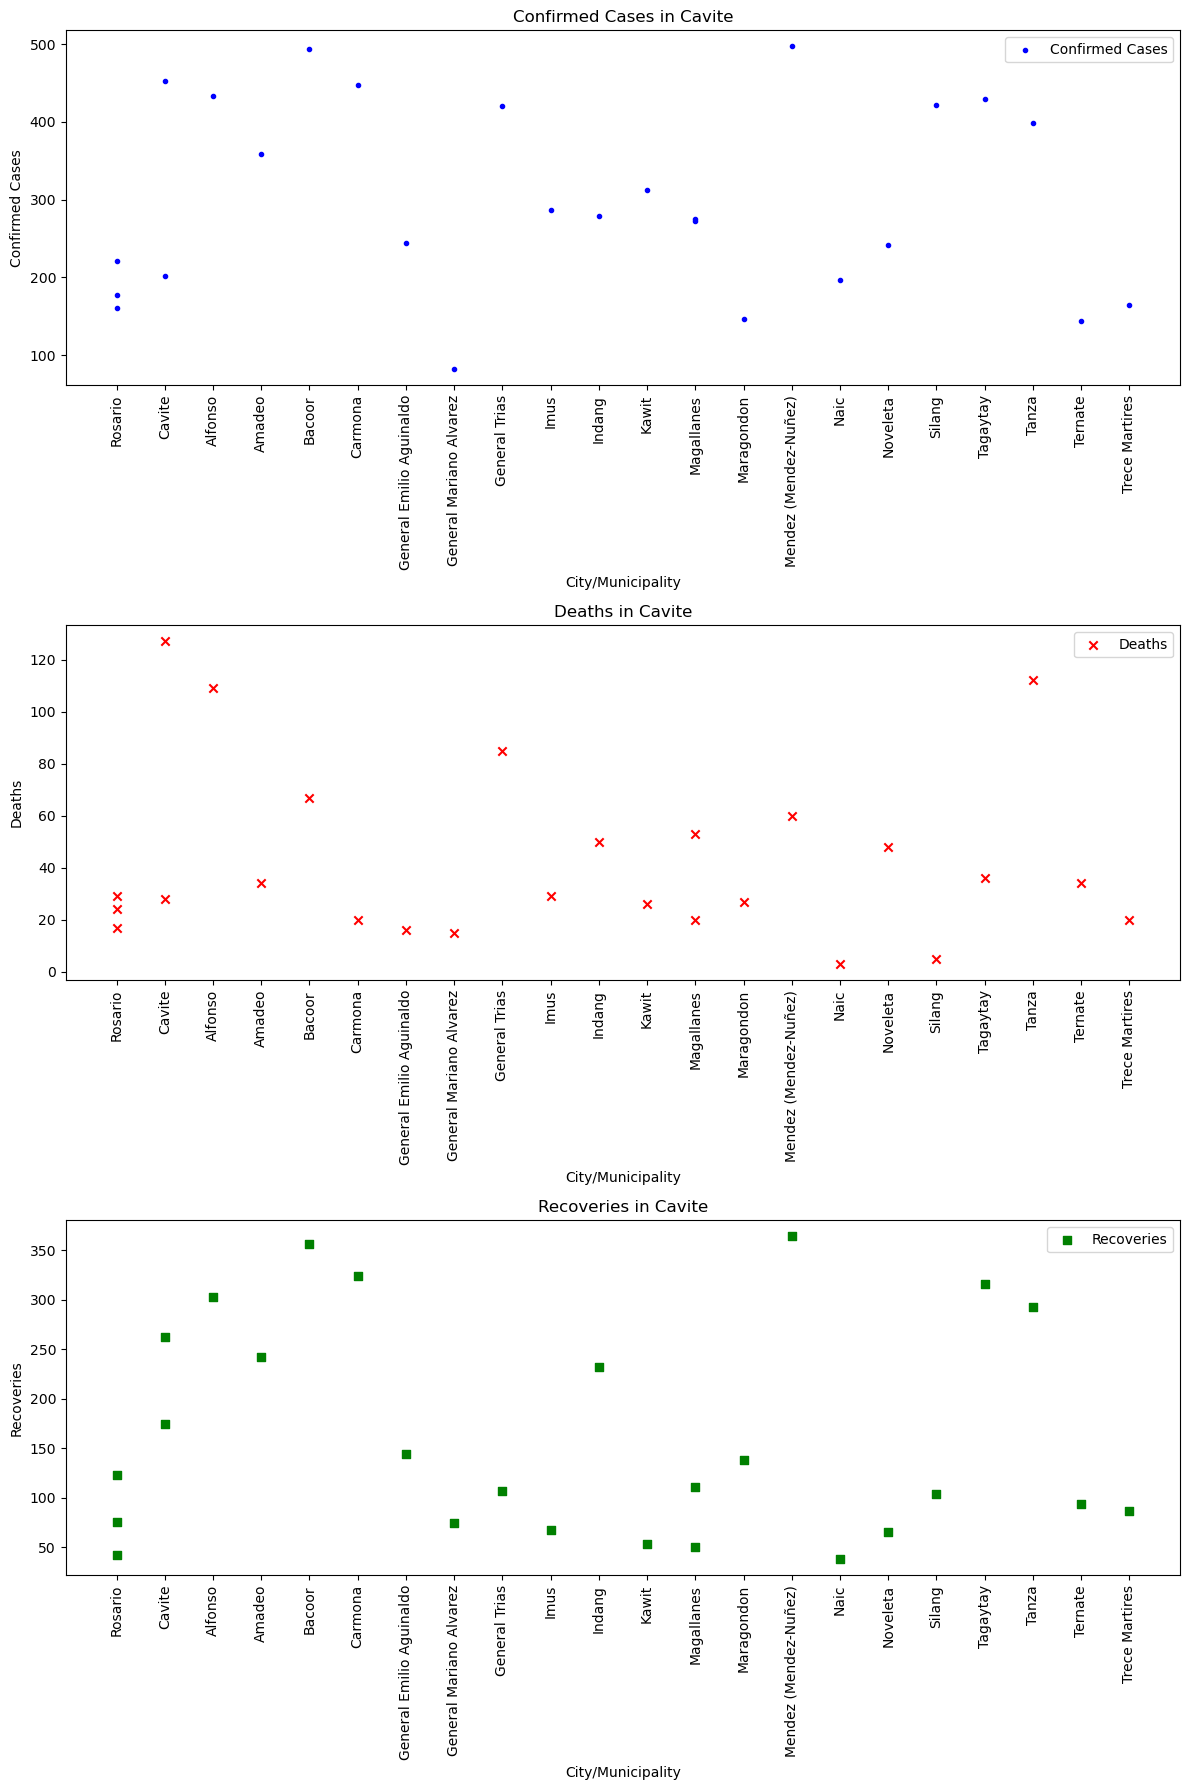

In [215]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

create_scatter_plot(
    axs[0],
    cavite,
    "Name",
    "Confirmed Cases",
    "blue",
    "Confirmed Cases",
    ".",
    "Confirmed Cases in Cavite",
    "City/Municipality",
    "Confirmed Cases",
)

create_scatter_plot(
    axs[1],
    cavite,
    "Name",
    "Deaths",
    "red",
    "Deaths",
    "x",
    "Deaths in Cavite",
    "City/Municipality",
    "Deaths",
)

create_scatter_plot(
    axs[2],
    cavite,
    "Name",
    "Recoveries",
    "green",
    "Recoveries",
    "s",
    "Recoveries in Cavite",
    "City/Municipality",
    "Recoveries",
)

plt.tight_layout()
plt.show()

## Line Plot

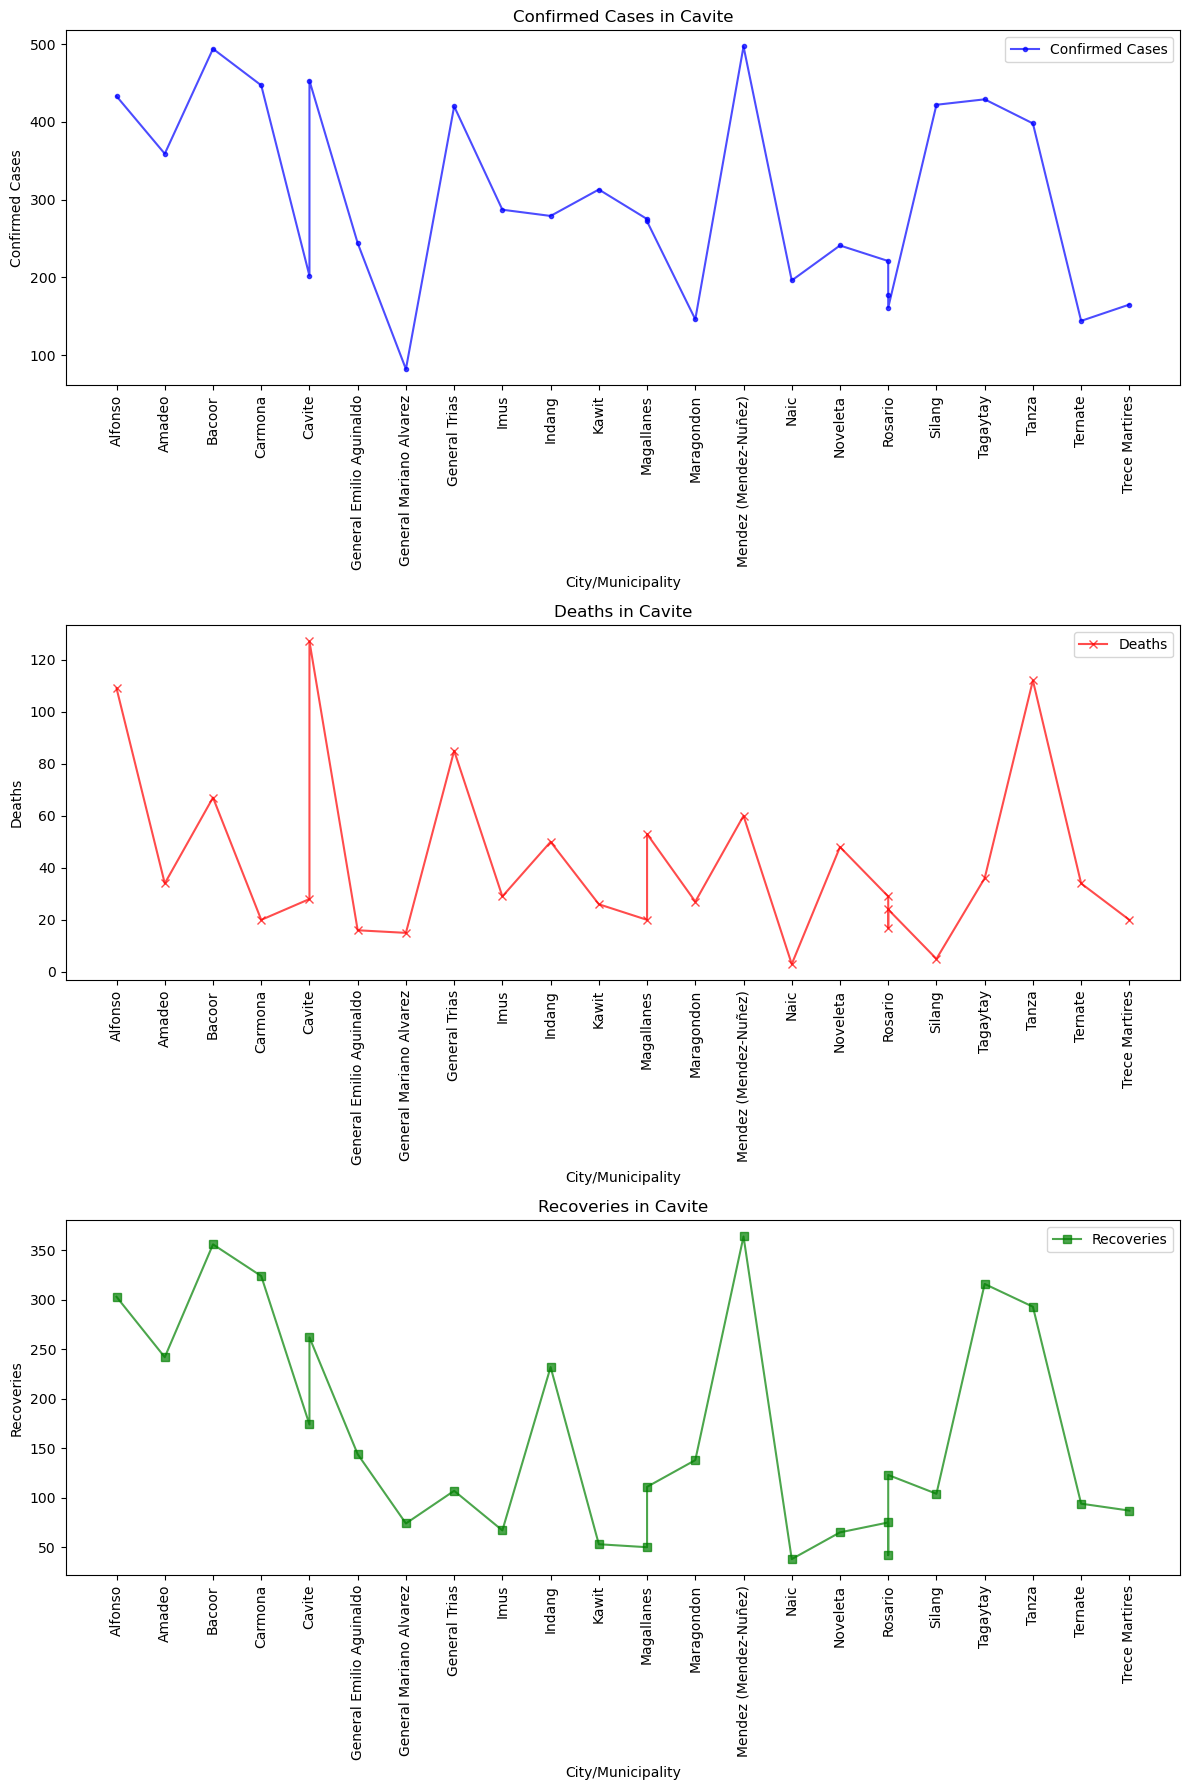

In [216]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))


create_line_plot(
    axs[0],
    cavite,
    "Name",
    "Confirmed Cases",
    "blue",
    "Confirmed Cases",
    ".",
    "Confirmed Cases in Cavite",
    "City/Municipality",
    "Confirmed Cases",
)

create_line_plot(
    axs[1],
    cavite,
    "Name",
    "Deaths",
    "red",
    "Deaths",
    "x",
    "Deaths in Cavite",
    "City/Municipality",
    "Deaths",
)

create_line_plot(
    axs[2],
    cavite,
    "Name",
    "Recoveries",
    "green",
    "Recoveries",
    "s",
    "Recoveries in Cavite",
    "City/Municipality",
    "Recoveries",
)

plt.tight_layout()
plt.show()

## Bar Plot

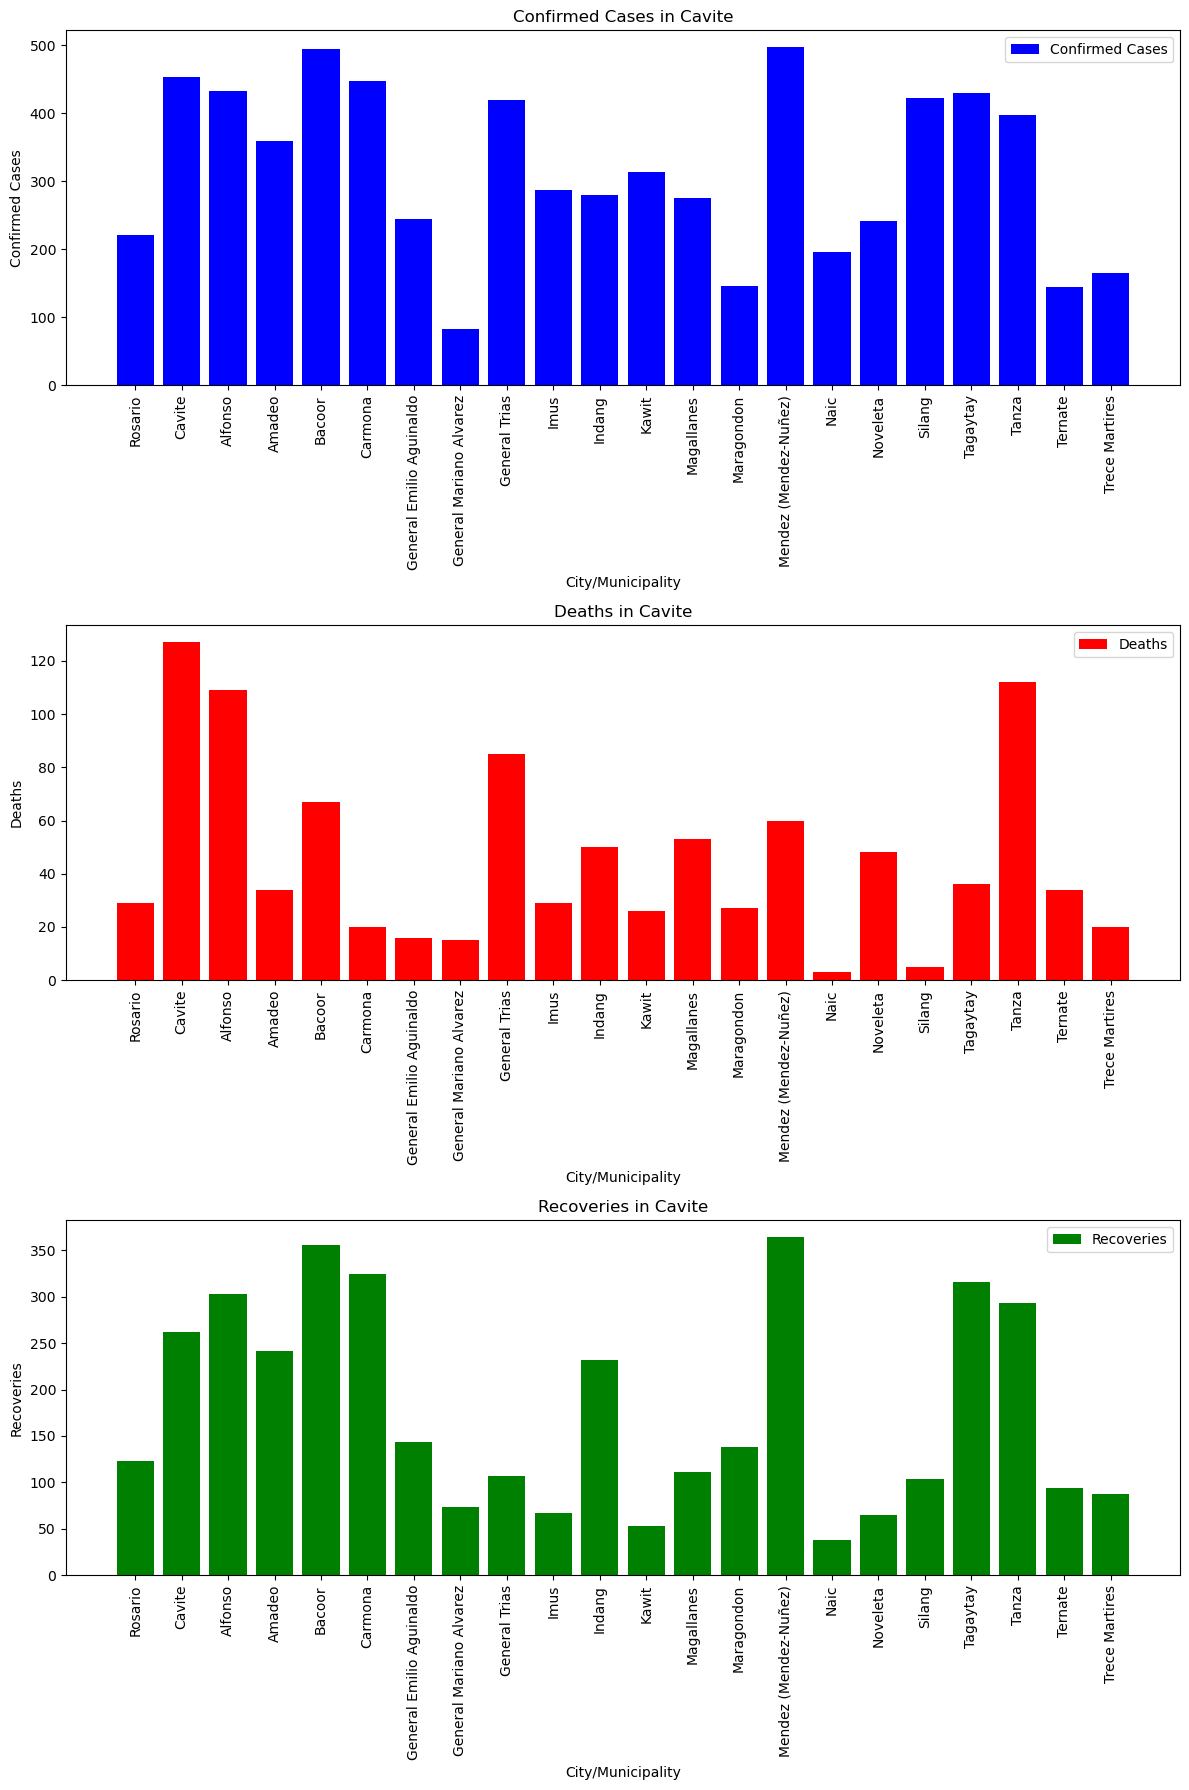

In [217]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))


create_bar_graph(
    axs[0],
    cavite,
    "Name",
    "Confirmed Cases",
    "blue",
    "Confirmed Cases",
    "Confirmed Cases in Cavite",
    "City/Municipality",
    "Confirmed Cases",
)

create_bar_graph(
    axs[1],
    cavite,
    "Name",
    "Deaths",
    "red",
    "Deaths",
    "Deaths in Cavite",
    "City/Municipality",
    "Deaths",
)

create_bar_graph(
    axs[2],
    cavite,
    "Name",
    "Recoveries",
    "green",
    "Recoveries",
    "Recoveries in Cavite",
    "City/Municipality",
    "Recoveries",
)

plt.tight_layout()
plt.show()

## Pie Chart

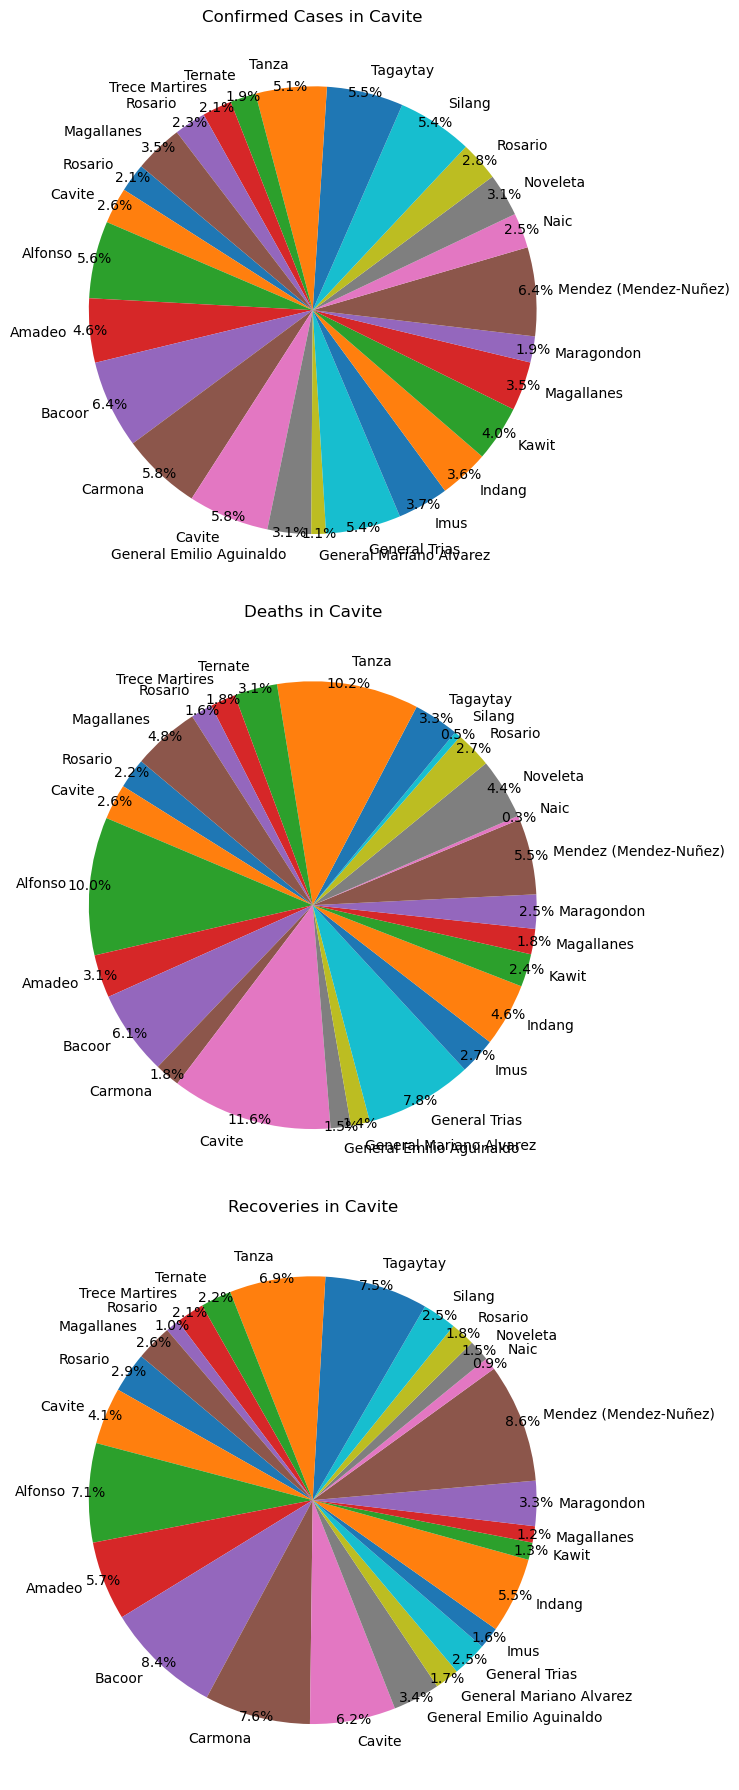

In [218]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

create_pie_chart(
    axs[0],
    cavite,
    "Confirmed Cases",
    "Name",
    "Confirmed Cases in Cavite",
)

create_pie_chart(
    axs[1],
    cavite,
    "Deaths",
    "Name",
    "Deaths in Cavite",
)

create_pie_chart(
    axs[2],
    cavite,
    "Recoveries",
    "Name",
    "Recoveries in Cavite",
)

plt.tight_layout()
plt.show()

## Histogram

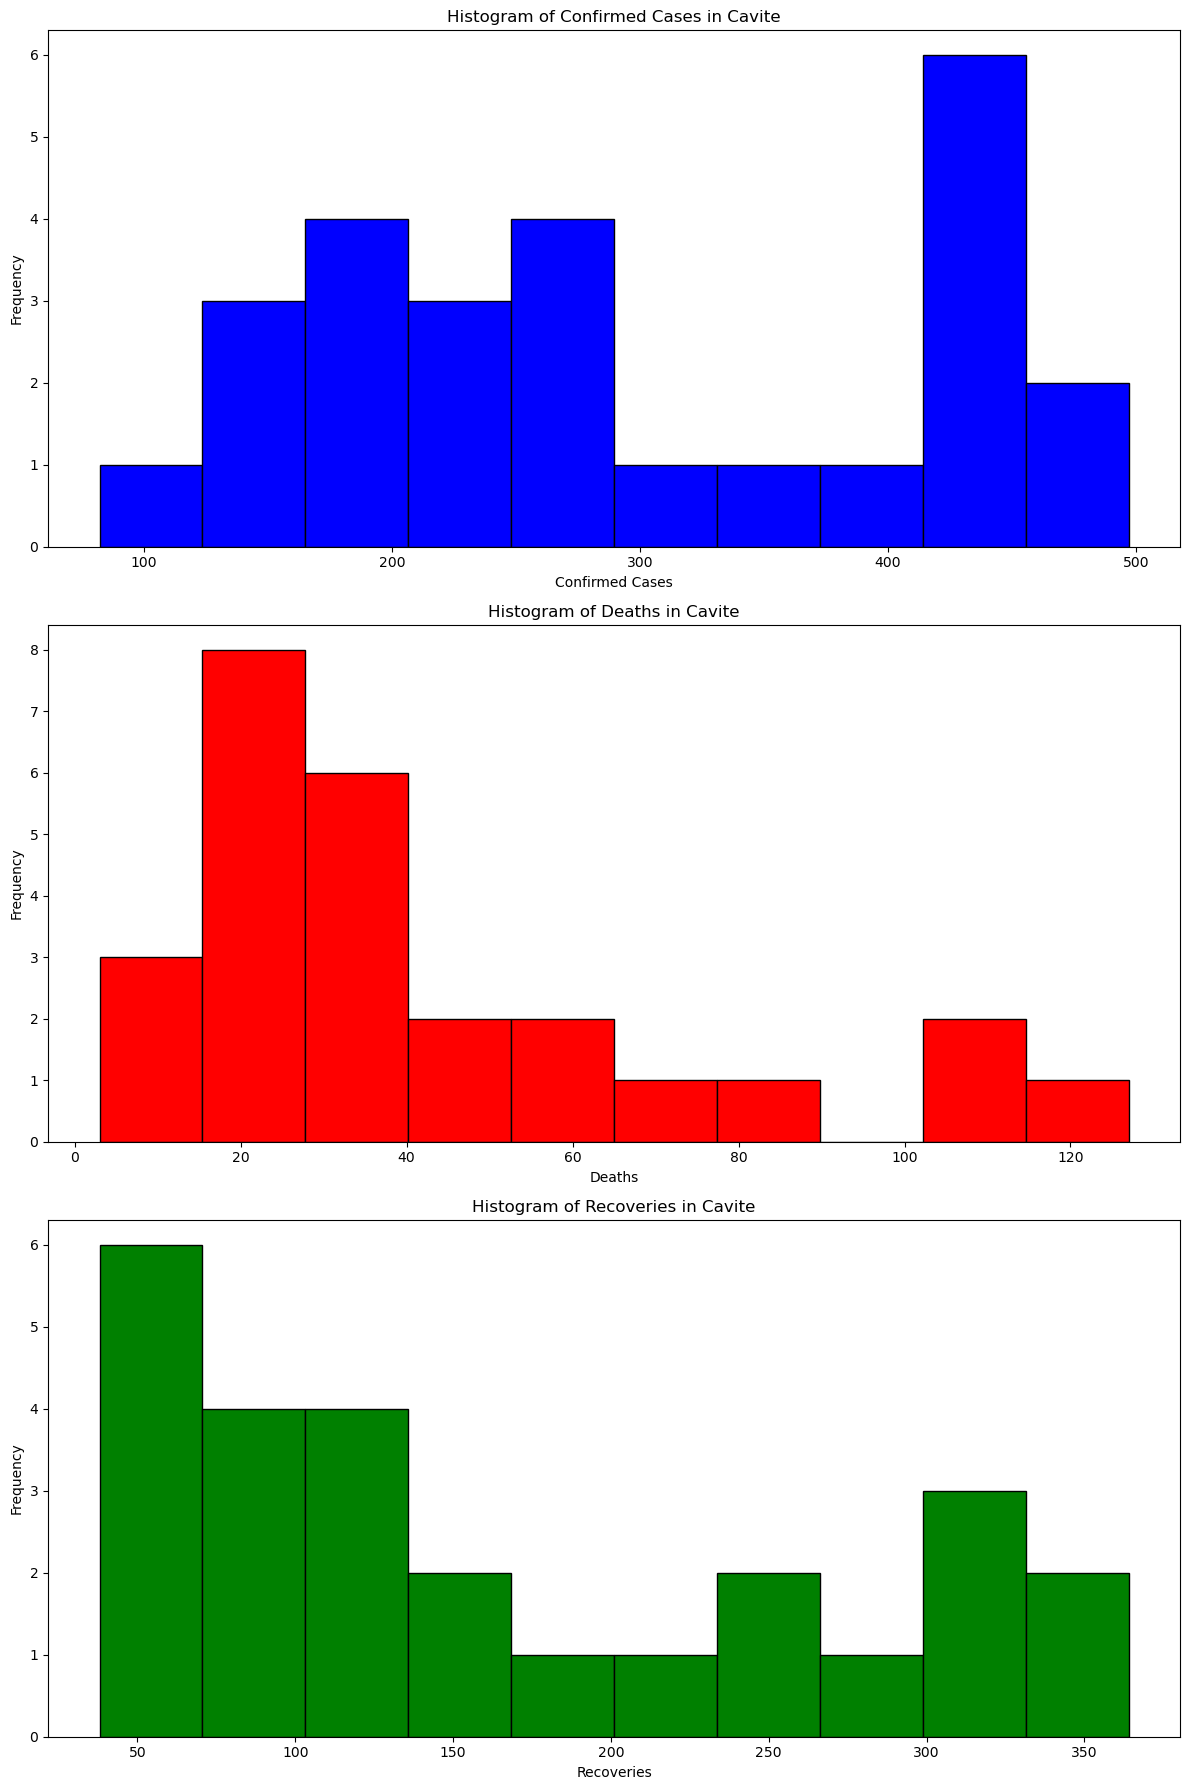

In [219]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))


create_histogram(
    axs[0],
    cavite,
    "Confirmed Cases",
    "blue",
    "Histogram of Confirmed Cases in Cavite",
    "Confirmed Cases",
    "Frequency",
)

create_histogram(
    axs[1],
    cavite,
    "Deaths",
    "red",
    "Histogram of Deaths in Cavite",
    "Deaths",
    "Frequency",
)

create_histogram(
    axs[2],
    cavite,
    "Recoveries",
    "green",
    "Histogram of Recoveries in Cavite",
    "Recoveries",
    "Frequency",
)

plt.tight_layout()
plt.show()